In [1]:
import pandas as pd
import os
os.getcwd()

'/home/topcuoglu/openrecombinhunt/src/analyse'

In [2]:
virus = "rsv-a"
metadata_path = f"../../data/raw/{virus}/raw_metadata.tsv" 
df = pd.read_csv(metadata_path, sep="\t")
df.head()

,accession,accessionVersion,genbank_accession,genbank_accession_rev,strain,date,region,country,division,location,...,G_clade,qc.overallScore,qc.overallStatus,missing_data,alignmentScore,alignmentStart,alignmentEnd,genome_coverage,G_coverage,F_coverage
0,PP_0015PZ1,PP_0015PZ1.1,AB470478,AB470478.1,Japan/PP_0015PZ1.1/2004-10-28,2004-10-28,Asia,Japan,Niigata,NaN,...,GA2.3.3,0.0,good,0,750,5285,5626,0.022463,0.344041,0.0
1,PP_0015Q0Z,PP_0015Q0Z.1,AB470479,AB470479.1,Japan/PP_0015Q0Z.1/2005-12-09,2005-12-09,Asia,Japan,Niigata,NaN,...,GA2.3.1,0.0,good,0,735,5285,5626,0.022463,0.344041,0.0
2,PP_0015Q4R,PP_0015Q4R.1,AB485786,AB485786.1,Japan/PP_0015Q4R.1,XXXX-XX-XX,Asia,Japan,Okinawa,NaN,...,GA2.3.1,0.0,good,0,1066,5168,5626,0.030148,0.465285,0.0
3,PP_0015Q1X,PP_0015Q1X.1,AB485783,AB485783.1,Japan/PP_0015Q1X.1,XXXX-XX-XX,Asia,Japan,Okinawa,NaN,...,GA2.3.1,0.0,good,0,1070,5168,5626,0.030148,0.465285,0.0
4,PP_0015Q2V,PP_0015Q2V.1,AB485784,AB485784.1,Japan/PP_0015Q2V.1,XXXX-XX-XX,Asia,Japan,Okinawa,NaN,...,GA2.3.3,0.0,good,0,1098,5168,5626,0.030148,0.465285,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31742 entries, 0 to 31741
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accession                    31742 non-null  object 
 1   accessionVersion             31742 non-null  object 
 2   genbank_accession            31616 non-null  object 
 3   genbank_accession_rev        31616 non-null  object 
 4   strain                       31742 non-null  object 
 5   date                         31742 non-null  object 
 6   region                       31742 non-null  object 
 7   country                      30681 non-null  object 
 8   division                     10457 non-null  object 
 9   location                     0 non-null      float64
 10  host                         96 non-null     object 
 11  date_submitted               31742 non-null  object 
 12  sra_accession                1932 non-null   object 
 13  authors         

In [4]:
df.columns

Index(['accession', 'accessionVersion', 'genbank_accession',
       'genbank_accession_rev', 'strain', 'date', 'region', 'country',
       'division', 'location', 'host', 'date_submitted', 'sra_accession',
       'authors', 'institution', 'dataUseTerms', 'dataUseTermsRestrictedUntil',
       'dataUseTermsUrl', 'clade', 'G_clade', 'qc.overallScore',
       'qc.overallStatus', 'missing_data', 'alignmentScore', 'alignmentStart',
       'alignmentEnd', 'genome_coverage', 'G_coverage', 'F_coverage'],
      dtype='object')

In [6]:
# display qc.overallScore column
df["qc.overallScore"]

0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
             ...     
31737        0.000000
31738        0.000000
31739        0.000000
31740        0.000000
31741    14542.921111
Name: qc.overallScore, Length: 31742, dtype: float64

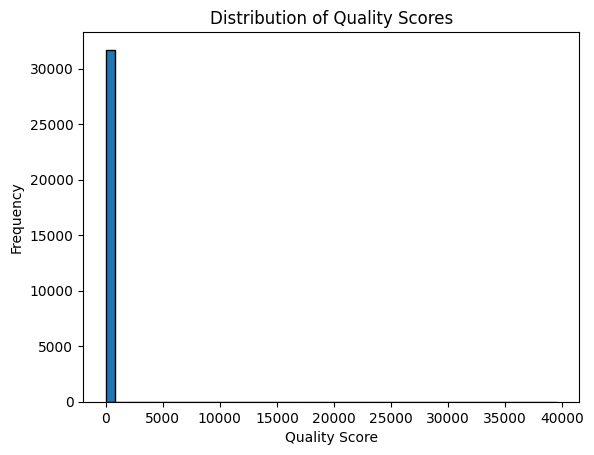

In [8]:
# plot the distribution of qc.overallScore without sns
import matplotlib.pyplot as plt
plt.hist(df["qc.overallScore"], bins=50, edgecolor='black')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.title('Distribution of Quality Scores')
plt.show()

In [9]:
# count 0 in qc.overallScore
df["qc.overallScore"].value_counts()

qc.overallScore
0.000000        28653
1.562500          887
56.250000         565
6.250000          253
25.000000          82
                ...  
190.440000          1
437.801111          1
61.387778           1
1359.151111         1
14542.921111        1
Name: count, Length: 317, dtype: int64

In [10]:
# display qc.overallStatus column
df["qc.overallStatus"]

0        good
1        good
2        good
3        good
4        good
         ... 
31737    good
31738    good
31739    good
31740    good
31741     bad
Name: qc.overallStatus, Length: 31742, dtype: object

In [11]:
# count NA in qc.overallStatus
na_count = df["qc.overallStatus"].isna().sum()

# count good in qc.overallStatus
value_counts = df["qc.overallStatus"].value_counts()

print(f"Number of NA in qc.overallStatus: {na_count}")
print("Value counts in qc.overallStatus:")
print(value_counts)

Number of NA in qc.overallStatus: 0
Value counts in qc.overallStatus:
qc.overallStatus
good        30782
mediocre      773
bad           187
Name: count, dtype: int64


In [12]:
# display missing_data column
df["missing_data"]

0        0
1        0
2        0
3        0
4        0
        ..
31737    0
31738    3
31739    0
31740    0
31741    0
Name: missing_data, Length: 31742, dtype: int64

In [13]:
value_counts = df["missing_data"].value_counts()
print("Value counts in missing_data:")
print(value_counts)

Value counts in missing_data:
missing_data
0       26934
1         439
2         156
3         130
21         75
        ...  
796         1
1294        1
780         1
966         1
293         1
Name: count, Length: 1396, dtype: int64


In [14]:
# display alignmentScore column
df["alignmentScore"]

0          750
1          735
2         1066
3         1070
4         1098
         ...  
31737    44874
31738    44788
31739    44828
31740    44802
31741    37845
Name: alignmentScore, Length: 31742, dtype: int64

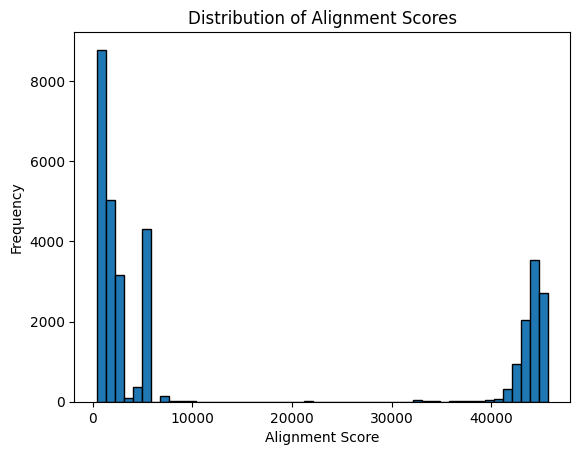

In [15]:
# plot the distribution of alignmentScore 
plt.hist(df["alignmentScore"], bins=50, edgecolor='black')
plt.xlabel('Alignment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Alignment Scores')
plt.show()

In [17]:
# display genome_coverage column
df["genome_coverage"]

0        0.022463
1        0.022463
2        0.030148
3        0.030148
4        0.030148
           ...   
31737    0.997767
31738    0.998686
31739    0.998883
31740    0.998489
31741    0.982266
Name: genome_coverage, Length: 31742, dtype: float64

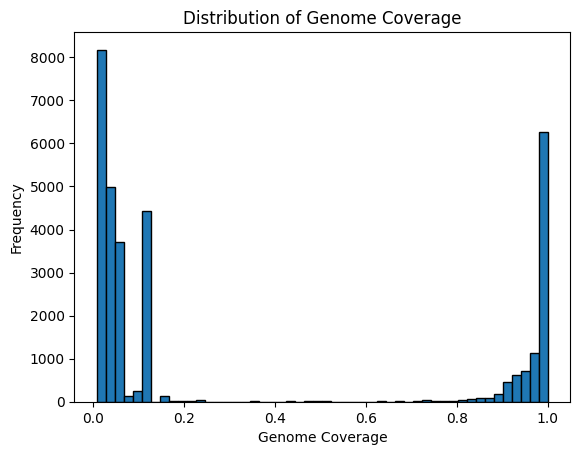

In [19]:
# plot the distribution of genome_coverage
plt.hist(df["genome_coverage"], bins=50, edgecolor='black')
plt.xlabel('Genome Coverage')
plt.ylabel('Frequency')
plt.title('Distribution of Genome Coverage')
plt.show()

In [22]:
# count genome_coverage > 0.9
genome_coverage_count = (df["genome_coverage"] > 0.9).sum()
print(f"Number of genomes with coverage > 0.9: {genome_coverage_count}")

Number of genomes with coverage > 0.9: 9214


In [23]:
# display G_coverage column
df["G_coverage"]

0        0.344041
1        0.344041
2        0.465285
3        0.465285
4        0.465285
           ...   
31737    1.000000
31738    1.000000
31739    1.000000
31740    1.000000
31741    1.000000
Name: G_coverage, Length: 31742, dtype: float64

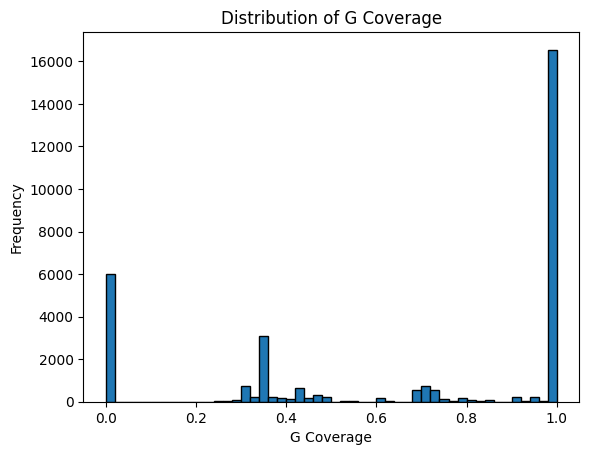

In [24]:
# plot the distribution of G_coverage
plt.hist(df["G_coverage"], bins=50, edgecolor='black')
plt.xlabel('G Coverage')
plt.ylabel('Frequency')
plt.title('Distribution of G Coverage')
plt.show()

In [25]:
# display F_coverage column
df["F_coverage"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
31737    1.0
31738    1.0
31739    1.0
31740    1.0
31741    1.0
Name: F_coverage, Length: 31742, dtype: float64

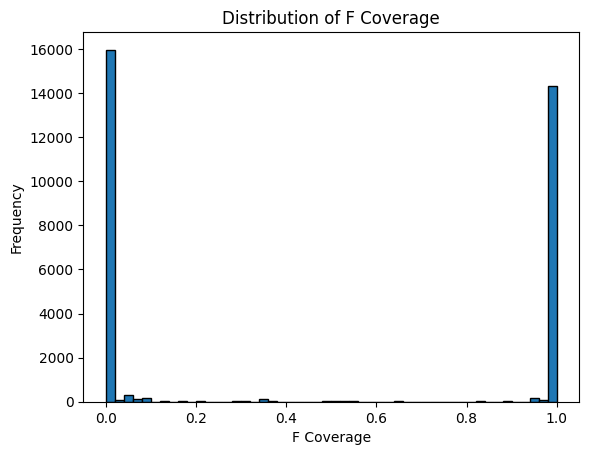

In [26]:
# plot the distribution of F_coverage
plt.hist(df["F_coverage"], bins=50, edgecolor='black')
plt.xlabel('F Coverage')
plt.ylabel('Frequency')
plt.title('Distribution of F Coverage')
plt.show()

In [30]:
# count G_coverage > 0.98
G_coverage_count = (df["G_coverage"] > 0.98).sum()

# count F_coverage > 0.98
F_coverage_count = (df["F_coverage"] > 0.98).sum()

# count both G_coverage and F_coverage > 0.98
both_coverage_count = ((df["G_coverage"] > 0.98) & (df["F_coverage"] > 0.98)).sum()

print(f"Number of genomes with G_coverage > 0.98: {G_coverage_count}")
print(f"Number of genomes with F_coverage > 0.98: {F_coverage_count}")
print(f"Number of genomes with both G_coverage and F_coverage > 0.98: {both_coverage_count}")

Number of genomes with G_coverage > 0.98: 16544
Number of genomes with F_coverage > 0.98: 14343
Number of genomes with both G_coverage and F_coverage > 0.98: 9837


In [31]:
# display clade column
df["clade"]

0          A.3.1
1            A.3
2            A.3
3            A.3
4          A.3.1
          ...   
31737        A.D
31738    A.D.5.2
31739    A.D.2.1
31740    A.D.2.1
31741        A.D
Name: clade, Length: 31742, dtype: object

In [38]:
# count NA in clade column
na_clade_count = df["clade"].isna().sum()
print(f"Number of NA in clade column: {na_clade_count}")

Number of NA in clade column: 0


In [32]:
# count unique values in clade column
unique_clades = df["clade"].nunique()
print(f"Number of unique clades: {unique_clades}")

Number of unique clades: 36


In [33]:
# display G_clade column
df["G_clade"]

0        GA2.3.3
1        GA2.3.1
2        GA2.3.1
3        GA2.3.1
4        GA2.3.3
          ...   
31737    GA2.3.5
31738    GA2.3.5
31739    GA2.3.5
31740    GA2.3.5
31741    GA2.3.5
Name: G_clade, Length: 31742, dtype: object

In [34]:
# count unique values in G_clade column
G_clade_count = df["G_clade"].nunique()
print(f"Number of unique G_clades: {G_clade_count}")

Number of unique G_clades: 15


In [35]:
# display date column
df["date"]

0        2004-10-28
1        2005-12-09
2        XXXX-XX-XX
3        XXXX-XX-XX
4        XXXX-XX-XX
            ...    
31737    2019-03-07
31738    2023-01-12
31739    2023-01-16
31740    2023-01-16
31741    2018-XX-XX
Name: date, Length: 31742, dtype: object

In [36]:
# count NA in date column
na_date_count = df["date"].isna().sum()

# count dates starting with XXXX
date_starts_with_xxxx_count = df["date"].str.startswith("XXXX").sum()

print(f"Number of NA in date column: {na_date_count}")
print(f"Number of dates starting with 'XXXX': {date_starts_with_xxxx_count}")

Number of NA in date column: 0
Number of dates starting with 'XXXX': 2397


In [43]:
# rows with date matching r'\d{4}-\d{2}-\d{2}'
date_pattern_count = df["date"].str.fullmatch(r'\d{4}-\d{2}-\d{2}').sum()
print(f"Number of rows with date matching 'YYYY-MM-DD': {date_pattern_count}")

# rows with date matching r'\d{4}-\d{2}'
date_pattern_count_2 = df["date"].str.fullmatch(r'\d{4}-\d{2}').sum()
print(f"Number of rows with date matching 'YYYY-MM': {date_pattern_count_2}")

# rows with date matching r'\d{4}'
date_pattern_count_3 = df["date"].str.fullmatch(r'\d{4}').sum()
print(f"Number of rows with date matching 'YYYY': {date_pattern_count_3}")

# total rows
total_rows = len(df)
print(f"Total number of rows: {total_rows}")

# display 5 sequences that do not match any of the date patterns
non_matching_dates = df[~df["date"].str.fullmatch(r'\d{4}-\d{2}-\d{2}') & 
                        ~df["date"].str.fullmatch(r'\d{4}-\d{2}') & 
                        ~df["date"].str.fullmatch(r'\d{4}') &
                        ~df["date"].str.startswith("XXXX") &
                        df["date"].notna()
                        ].head(5)
print("5 sequences with non-matching dates:")
print(non_matching_dates[["date", "accession"]])

Number of rows with date matching 'YYYY-MM-DD': 19879
Number of rows with date matching 'YYYY-MM': 0
Number of rows with date matching 'YYYY': 0
Total number of rows: 31742
5 sequences with non-matching dates:
          date   accession
30  2009-XX-XX  PP_0015RY1
31  2008-XX-XX  PP_0015S1V
32  2009-XX-XX  PP_0015RZZ
33  2009-XX-XX  PP_0015S0X
34  2007-XX-XX  PP_0015S2T


In [37]:
# display date_submitted column
df["date_submitted"]

0        2009-05-19
1        2009-05-19
2        2009-08-25
3        2009-08-25
4        2009-08-25
            ...    
31737    2025-06-30
31738    2025-06-30
31739    2025-06-30
31740    2025-06-30
31741    2023-08-09
Name: date_submitted, Length: 31742, dtype: object

In [2]:
# load haplocov_reformatted
import pandas as pd
path = f"../../results/haplocov_output/rsv-a/dist5size50/haplocov_reformatted.tsv"
haplocov_df = pd.read_csv(path, sep="\t")

# count the number of unique mutations in haplocov_reformatted
# mutation column has a list of mutations separated by commas
unique_mutations = haplocov_df['mutations'].str.split(',').explode().nunique()
print(f"Number of unique mutations in haplocov_reformatted: {unique_mutations}")

Number of unique mutations in haplocov_reformatted: 17039


In [3]:
# count rows (sequences) in haplocov_reformatted
rows_count = len(haplocov_df)
print(f"Number of rows in haplocov_reformatted: {rows_count}")

Number of rows in haplocov_reformatted: 23819


In [4]:
# count the number of sequences that set(mutations) is not equal to list(mutations)
duplicate_count = haplocov_df['mutations'].dropna().apply(lambda s: len(s.split(',')) != len(set(s.split(',')))).sum()
print(f"Number of sequences with duplicate mutations in their list: {duplicate_count}")

Number of sequences with duplicate mutations in their list: 0


In [5]:
# count rows with empty mutations
empty_mutations_count = haplocov_df['mutations'].isna().sum()
print(f"Number of rows with empty mutations: {empty_mutations_count}")

Number of rows with empty mutations: 0


In [1]:
#########
# DEBUG #

import pandas as pd

# load change2lineage_probability.parquet
change2lineage_prob_path = "../../environments/rsv-a/dist5size50/change2lineage_probability.parquet"
change2lineage_prob_df = pd.read_parquet(change2lineage_prob_path)
change2lineage_prob_df.head()

,A.2.1,A.2.1.1,A.3,A.3.1,A.3.1.1,A.3.1.1.NmC1,A.3.1.NmC1,A.3.1.NmC2,A.D,A.D.1,...,A.D.4.NmC2,A.D.4.NmC3,A.D.5,A.D.5.1,A.D.5.2,A.D.5.3,A.D.5.NmC1,A.D.NmC1,A.D.NmC2,pos
4_C|G,0.008174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.027113,0.000000,0.0,0.0,0.0,0.0,4
5_G|A,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.002793,0.0,0.0,0.0,0.0,5
10_A|T,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,10
12_T|C,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,12
13_GC|TG,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,13
